<a href="https://colab.research.google.com/github/AlyssaPh/-MAT-421/blob/main/ModuleJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Network Analysis**


**Graph Models**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import SpectralClustering
from scipy.linalg import eigh

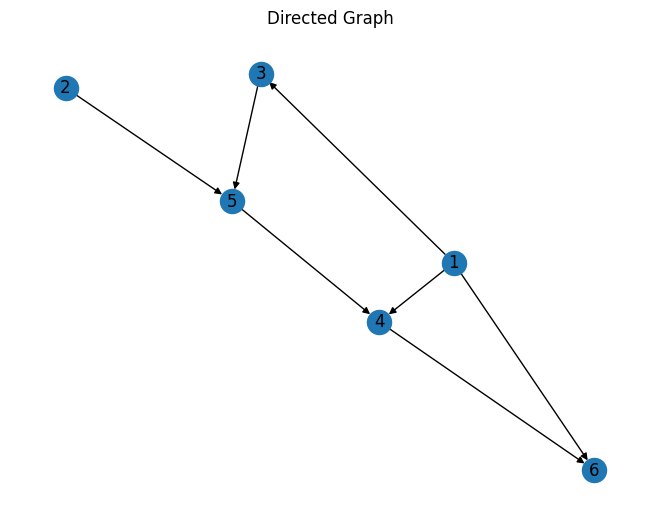

In [10]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

# Add edges
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 5)
G.add_edge(3, 5)
G.add_edge(5, 4)
G.add_edge(1, 6)
G.add_edge(4, 6)

# Plot
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Directed Graph")
plt.show()

**Laplacian Matrix**

In [11]:
e1, e2, e3 = 1, 1, 1  # edge weights
A = np.array([[0, e1, e2, e3],
              [e1, 0, 0, 0],
              [e2, 0, 0, 0],
              [e3, 0, 0, 0]])

# Degree matrix
D = np.diag(np.sum(A, axis=1))

# Laplacian matrix
L = D - A
print("Laplacian matrix:\n", L)

# Incidence matrix
IG = np.array([[np.sqrt(e1), -np.sqrt(e2), -np.sqrt(e3)],
               [-np.sqrt(e1), 0, 0],
               [0, np.sqrt(e2), 0],
               [0, 0, np.sqrt(e3)]])

# Verify L = IG @ IG.T
print("\nIG @ IG.T:\n", IG @ IG.T)

# Verify x^T L x = sum E_ij (x_i - x_j)^2
x = np.random.rand(4)
xTLx = x.T @ L @ x
sum_diff = e1*(x[0]-x[1])**2 + e2*(x[0]-x[2])**2 + e3*(x[0]-x[3])**2
print("\nx^T L x:", xTLx)
print("Sum E_ij (x_i - x_j)^2:", sum_diff)


Laplacian matrix:
 [[ 3 -1 -1 -1]
 [-1  1  0  0]
 [-1  0  1  0]
 [-1  0  0  1]]

IG @ IG.T:
 [[ 3. -1. -1. -1.]
 [-1.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [-1.  0.  0.  1.]]

x^T L x: 0.4449963098482524
Sum E_ij (x_i - x_j)^2: 0.4449963098482524


**Spectral Graph Bipartitioning**

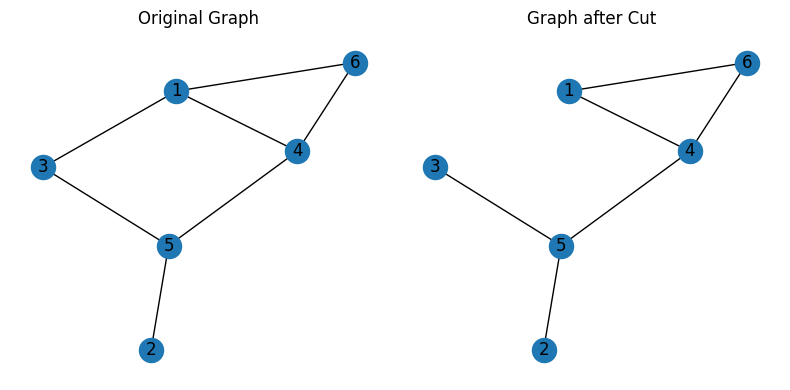

In [12]:
# An example showing a cut in Python

import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()
# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

# Add edges
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 5)
G.add_edge(3, 5)
G.add_edge(5, 4)
G.add_edge(1, 6)
G.add_edge(4, 6)

# Define cut
cut_edges = [(1, 2), (1, 3), (2, 3)]

# remove cut edges
G_cut = G.copy()
G_cut.remove_edges_from(cut_edges)

# Plot the original graph
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Original Graph")

# Plot the cut
plt.subplot(1, 2, 2)
nx.draw(G_cut, pos, with_labels=True)
plt.title("Graph after Cut")

plt.tight_layout()
plt.show()